In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
from astropy.table import Table
%matplotlib widget
import os
import pandas as pd

In [2]:
def get_files_with_suffix(directory,suf=''):
    '''For a given directory, finds all files which end with a given suffix and sends them in a sorted list
    
    directory: the directory to get the image paths from
    suf: The suffix 
    '''
    file_list = os.listdir(directory)
    img_list1 = [file for file in file_list if file.endswith(suf)]

    files = [directory+"\\"+file for file in img_list1]
    files.sort()
    return files

def get_files_with_prefix_suffix(directory,pre='',suf=''):
    '''For a given directory, finds all files which start with a given prefix and/or end with a given suffix and sends them in a sorted list
    
    directory: the directory to get the image paths from
    pre: The prefix
    suf: The suffix 
    '''
    file_list = os.listdir(directory)
    img_list1 = [file for file in file_list if (file.endswith(suf) and file.startswith(pre))]

    files = [directory+"\\"+file for file in img_list1]
    files.sort()
    return files

In [133]:
paths=get_files_with_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy2","g30.fits")
paths

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l25_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l30_b15_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l30g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l40_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l50_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l50b15_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l60_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l70_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l80_b15_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l80_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\

In [134]:
paths_bg = get_files_with_prefix_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy2",suf='b15_g30.fits')
paths_bg

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l30_b15_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l50b15_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l80_b15_g30.fits']

In [ ]:
paths2= get_files_with_prefix_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy",pre='l')
paths2

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l20_2.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l20_2_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l20_2_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l20_2_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l25.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l25_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l25_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l25_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l30_fixed.fits',
 'C:\\Users\\praty

In [145]:
paths2_bg = get_files_with_prefix_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy",pre='bgl')
paths2_bg

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\bgl20b12.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\bgl50b12.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\bgl85b12.fits']

In [146]:
def pandas_to_Table(df_arr,tablepaths,overwrite=False):
    '''Save several dataframes as astropy tables
        df_arr: List of dataframes to be saved
        tablepaths: List of paths where fits tables will be saved to
        overwrite: Overwrite existing saved fits tables'''
    for (df,tablepath) in zip(df_arr,tablepaths):
        
        t = Table.from_pandas(df)
        t.write(tablepath,format='fits',overwrite = overwrite)


In [149]:
# for path in paths2:
for path in paths2_bg:
    hdul = fits.open(path)
    freq = np.arange(start=hdul[0].header['CRVAL1']-hdul[0].header['CDELT1']*hdul[0].header['CRPIX1'],stop=hdul[0].header['CRVAL1']+hdul[0].header['CDELT1']*hdul[0].header['CRPIX1'], step=hdul[0].header['CDELT1'])

    df=pd.DataFrame(np.array([freq,hdul[0].data[0,0,:]]).T,columns=["Frequency (Hz)","Intensity"])
    
    t = Table.from_pandas(df)
    t.write(path[:-5]+"_fixed.fits",format='fits',overwrite = 'true')


In [10]:
hdul = fits.open(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy2\l80_g30.fits")

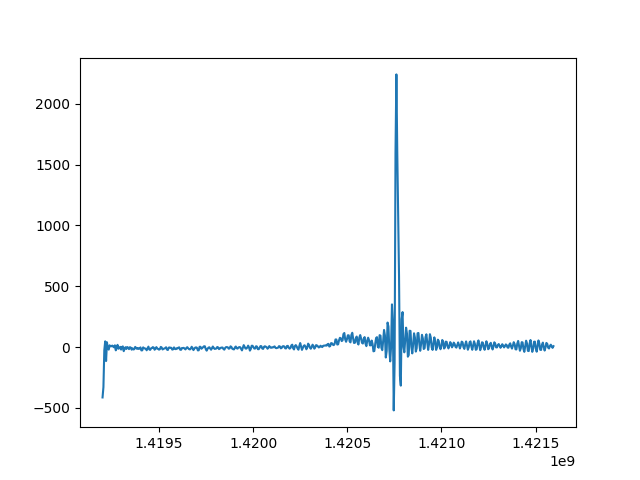

In [16]:
plt.close("all")
freq = np.arange(start=hdul[0].header['CRVAL1']-hdul[0].header['CDELT1']*hdul[0].header['CRPIX1'],stop=hdul[0].header['CRVAL1']+hdul[0].header['CDELT1']*hdul[0].header['CRPIX1'], step=hdul[0].header['CDELT1'])
plt.plot(freq,hdul[0].data[0,0,:])
plt.show()

In [151]:
paths_fixed = get_files_with_prefix_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy",'l','fixed.fits')
paths_fixed

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l20_2_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l25_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l35_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l40_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l45_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l50_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l55_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l60_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l65_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Clou

In [152]:
paths_fixed_bg = get_files_with_prefix_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy",pre='bgl',suf='fixed.fits')
paths_fixed_bg

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\bgl20b12_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\bgl50b12_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\bgl85b12_fixed.fits']

In [73]:
for bg in paths_fixed_bg:
    paths_fixed.remove(bg)
paths_fixed

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l25_g30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l30g30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l40_g30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l50_g30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l60_g30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l70_g30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l80_g30_fixed.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l89_g30_fixed.fits']

In [154]:
# plt.close('all')
for i in range(4):
    spt=Table.read(paths_fixed[i])
    bg=Table.read(paths_fixed_bg[0])
    
    bg_subtr=Table([spt['Frequency (Hz)'],spt['Intensity']-bg['Intensity']])
    bg_subtr.write(paths_fixed[i][:-5]+'_bgsub.fits',format='fits',overwrite=True)

In [155]:
# plt.close('all')
for i in range(4,10):
    spt=Table.read(paths_fixed[i])
    bg=Table.read(paths_fixed_bg[1])
    
    bg_subtr=Table([spt['Frequency (Hz)'],spt['Intensity']-bg['Intensity']])
    bg_subtr.write(paths_fixed[i][:-5]+'_bgsub.fits',format='fits',overwrite=True)

In [156]:
# plt.close('all')
for i in range(10,15):
    spt=Table.read(paths_fixed[i])
    bg=Table.read(paths_fixed_bg[2])
    
    bg_subtr=Table([spt['Frequency (Hz)'],spt['Intensity']-bg['Intensity']])
    bg_subtr.write(paths_fixed[i][:-5]+'_bgsub.fits',format='fits',overwrite=True)

In [157]:
paths_fixed_bgsub=get_files_with_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy",'_bgsub.fits')
paths_fixed_bgsub

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l20_2_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l25_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l30_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l35_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l40_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l45_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l50_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l55_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l60_fixed_bgsub.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l

In [158]:
H_freq = 1420.405751768*10**6
c=299792458
for pbgs in paths_fixed_bgsub:
    tb = Table.read(pbgs)
    tb['Velocity (m/s)'] = c*(H_freq-tb['Frequency (Hz)'])/H_freq
    # maxfreq=tb['Frequency (Hz)'][np.argmax(tb['Intensity'])]
    # v=c*(H_freq-maxfreq)/H_freq
    tb.write(pbgs[:-5]+"_vel.fits",format='fits',overwrite=True)
(tb)

Frequency (Hz),Intensity,Velocity (m/s)
float64,float64,float64
1419200000.0,8.224609375,254487.3433641548
1419204687.5,9.650390625,253497.99426786607
1419209375.0,13.216796875,252508.64517157734
1419214062.5,1.091796875,251519.29607528858
1419218750.0,-43.513671875,250529.94697899985
1419223437.5,-82.740234375,249540.59788271112
1419228125.0,-58.845703125,248551.24878642237
1419232812.5,8.552734375,247561.89969013364
1419237500.0,9.978515625,246572.5505938449


In [3]:
paths_vel=get_files_with_suffix(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy",'_vel.fits')
paths_vel

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l20_2_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l25_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l30_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l35_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l40_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l45_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l50_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l55_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy\\l60_fixed_bgsub_vel.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Ast

C:\Users\praty\OneDrive - UT Cloud\Astro Lab\Radio\grp3\grp3\galaxy\l85_fixed_bgsub_vel.fits


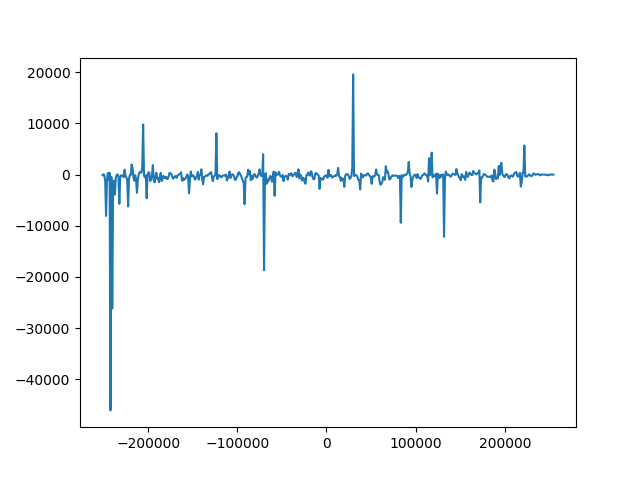

In [37]:
plt.close("all")
i=13
print(paths_vel[i])
tb = Table.read(paths_vel[i])
plt.plot(tb['Velocity (m/s)'],tb['Intensity'])
plt.show()

Peak data:
1. 20: Nothing
2. 25: 45700,110000,115000
3. 30: 100000, 54000, 32000 periodic
4. 35: 34800 high, 58000, 49000, 85000?, 72000?, 68000?
5. 40:  47500, 35000, 27000
6. 45:  8000, 30000?, 42500?, 
7. 50: 6000?, 15000?, 32000?, 40000?
8. 55: 2000,16000, 34000 periodic
9. 60: 27000 high, 
10. 65: 14000, 4000 periodic
11. 70: None
12. 75: None after this really

In [ ]:
R0 = 8.5
V0 = 220

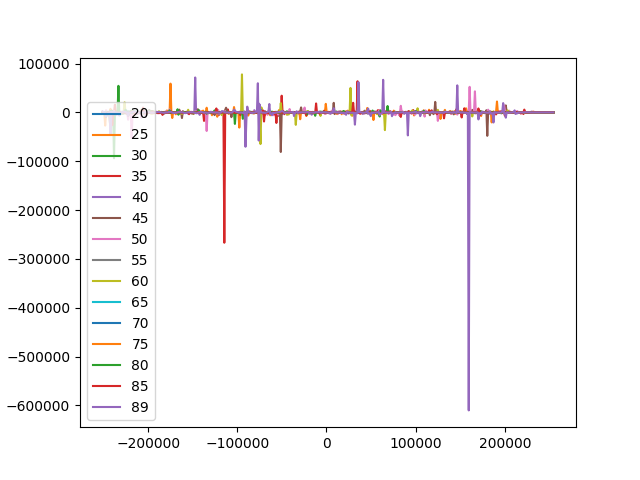

In [21]:
plt.close("all")
for pv in paths_vel:
    tb = Table.read(pv)
    plt.plot(tb['Velocity (m/s)'],tb['Intensity'])
# plt.legend([25,30,40,50,60,70,80,89])
plt.legend([20,25,30,35,40,45,50,55,60,65,70,75,80,85,89])

plt.show()

In [135]:
for bg in paths_bg:
    paths.remove(bg)
paths

['C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l25_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l30g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l40_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l50_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l60_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l70_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l80_g30.fits',
 'C:\\Users\\praty\\OneDrive - UT Cloud\\Astro Lab\\Radio\\grp3\\grp3\\galaxy2\\l89_g30.fits']

In [19]:
plt.close("all")
for pv in paths2:
    hdul = fits.open(pv)
    plt.plot(hdul[0].data[0,0,:])

# plt.legend([25,30,40,50,60,70,80,89])
plt.legend([20,25,30,35,40,45,50,55,60,65,70,75,80,85,89])
plt.show()

NameError: name 'paths2' is not defined